# Twitter hate speech detection 
## Predictive Modeling

### December 8, 2021
### Clare Garberg (cag199) & Abby Fremaux (amf338)

### Objectives:
1. Split into train and test dataframes
2. Build Random Forest, Logistic Regression, Multinomial Naïve Bayes, Linear SVM, and RBF SVM predictive models
3. Print evaluative metrics such as accuracy and F1 Score
4. Create confusion matrices and top feature charts

In [11]:
## Cleaning and preparing tweet text data

## importing necessary libraries

import pandas as pd
import os
import re
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from spacy.language import Language
import numpy as np
import io

## Setting working directory

os.chdir("/Users/claregarberg/Documents/Graduate School/Fall 2021 Semester/580 NLP for Data Analytics/")

### importing data

clean_tweets = pd.read_csv('clean_tweets_b.csv', lineterminator='\n')

In [12]:
## splitting into training and testing dataframes
from sklearn.model_selection import train_test_split

train_tweets, test_tweets = train_test_split(clean_tweets, test_size = 0.2, random_state=43)

## separating and dropping labels

train_labels = train_tweets['LABEL']
test_labels = test_tweets['LABEL']

train_tweets = train_tweets.drop('LABEL', axis = 1)
test_tweets = test_tweets.drop('LABEL', axis = 1)

In [13]:
train_tweets.head()

,Unnamed: 0,aaaaah,aande,aap,abe,abet,ability,able,ableism,abou,...,zeegoldaward,zen,zero,zimbabwe,zionazi,zionism,zionist,zip,zootopia,zuma
815,815,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,1573,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,1238,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153,1153,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
926,926,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
#dropping old index variable
train_tweets = train_tweets.drop(train_tweets.columns[0], axis=1)
test_tweets = test_tweets.drop(test_tweets.columns[0], axis=1)
train_tweets.head()

,aaaaah,aande,aap,abe,abet,ability,able,ableism,abou,absolutely,...,zeegoldaward,zen,zero,zimbabwe,zionazi,zionism,zionist,zip,zootopia,zuma
815,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1573,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1153,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
926,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
## Random Forest
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

rf = RandomForestClassifier(n_estimators = 100, random_state = 43)

# Train the model on training data
rf.fit(train_tweets, train_labels)

rf_predictions = rf.predict(test_tweets)

In [16]:
rf_CM = confusion_matrix(test_labels, rf_predictions)
#rf_CM

rf_acc = accuracy_score(test_labels, rf_predictions)
#rf_acc
print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf_acc))

from sklearn.metrics import f1_score

rf_f1 = f1_score(test_labels, rf_predictions)
print('F1 Score of random forest classifier on test set: {:.2f}'.format(rf_f1))

Accuracy of random forest classifier on test set: 0.78
F1 Score of random forest classifier on test set: 0.78


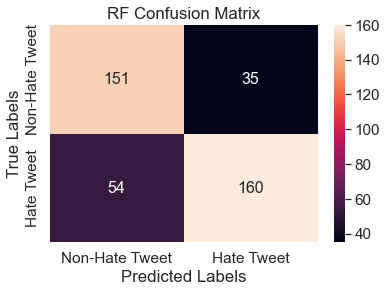

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(rf_CM, annot=True, fmt='g', ax=ax, annot_kws={"size": 16});
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('RF Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet'])
ax.yaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet']);
plt.show()


In [18]:
from sklearn.inspection import permutation_importance

## feature importances
result = permutation_importance(rf, test_tweets, test_labels, n_repeats=2, random_state=43, n_jobs=2)

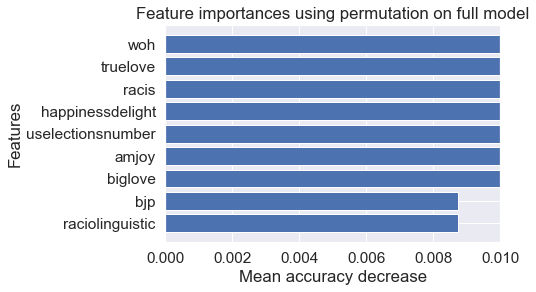

In [19]:
sorted_idx = result.importances_mean.argsort()
sorted_idx_top10 = sorted_idx[-9:]

fig, ax = plt.subplots()
plt.barh(clean_tweets.columns[sorted_idx_top10], result.importances_mean[sorted_idx_top10])
ax.set_title("Feature importances using permutation on full model")
ax.set_xlabel("Mean accuracy decrease")
ax.set_ylabel("Features")
plt.xlim([0,0.01])
plt.show()

In [20]:
## tuning the random forest model

from sklearn.model_selection import GridSearchCV

n_estimators = [100, 200, 300, 400, 500]
max_depth = [None, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(train_tweets, train_labels)

# summarizing results
print("Best: %f using %s" % (bestF.best_score_, bestF.best_params_))

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
Best: 0.804987 using {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


In [22]:
## best fit rf model
rf_best = RandomForestClassifier(n_estimators= 200, max_depth = None, min_samples_leaf = 2, 
                                 min_samples_split= 2, random_state = 43)

# Train the model on training data
rf_best.fit(train_tweets, train_labels)

rf_predictions_best = rf_best.predict(test_tweets)

rf_CM_best = confusion_matrix(test_labels, rf_predictions_best)
rf_CM_best

rf_acc_best = accuracy_score(test_labels, rf_predictions_best)
rf_acc_best

print('Accuracy of random forest classifier on test set: {:.2f}'.format(rf_acc_best))

rf_f1_best = f1_score(test_labels, rf_predictions)
print('F1 Score of random forest classifier on test set: {:.2f}'.format(rf_f1_best))

Accuracy of random forest classifier on test set: 0.81
F1 Score of random forest classifier on test set: 0.78


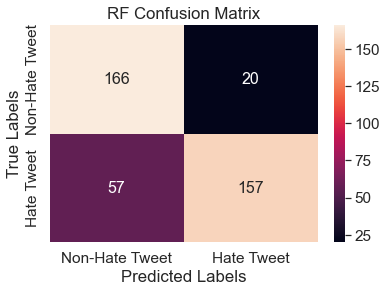

In [23]:
## best confusion matrix, one can see it is the same
ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(rf_CM_best, annot=True, fmt='g', ax=ax, annot_kws={"size": 16});
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('RF Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet'])
ax.yaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet']);
plt.show()

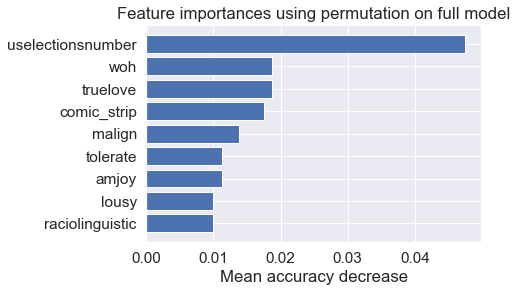

In [42]:
## best feature importance
result_best = permutation_importance(rf_best, test_tweets, test_labels, n_repeats=2, random_state=43, n_jobs=2)
sorted_idx = result_best.importances_mean.argsort()
sorted_idx_top10 = sorted_idx[-9:]

fig, ax = plt.subplots()
plt.barh(clean_tweets.columns[sorted_idx_top10], result_best.importances_mean[sorted_idx_top10])
ax.set_title("Feature importances using permutation on full model")
ax.set_xlabel("Mean accuracy decrease")
plt.show()

In [25]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter = 1000, random_state=43)

# Train the model on training data
lr.fit(train_tweets, train_labels)

lr_predictions = lr.predict(test_tweets)

In [26]:
lr_CM = confusion_matrix(test_labels, lr_predictions)
#lr_CM

lr_acc = accuracy_score(test_labels, lr_predictions)
#lr_acc
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(lr_acc))

lr_f1 = f1_score(test_labels, lr_predictions)
print('F1 Score of logistic regression classifier on test set: {:.2f}'.format(lr_f1))

Accuracy of logistic regression classifier on test set: 0.83
F1 Score of logistic regression classifier on test set: 0.84


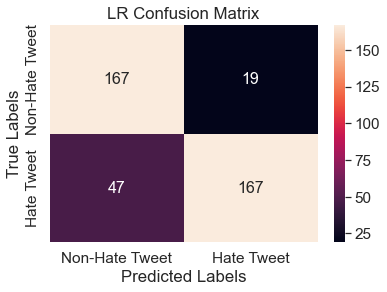

In [27]:
# plots confusion matrix

ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(lr_CM, annot=True, fmt='g', ax=ax, annot_kws={"size": 16});
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('LR Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet'])
ax.yaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet']);
plt.show()

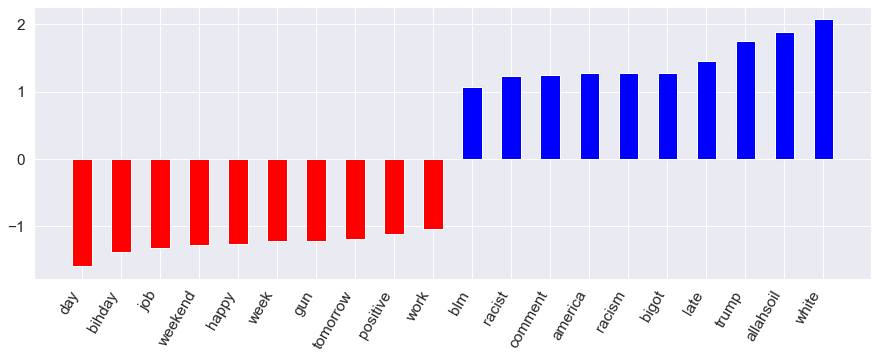

In [28]:
#plots top features
def plot_coefficients(MODEL, COLNAMES=train_tweets.columns, top_features=10):
    coef = MODEL.coef_.ravel()
    top_positive_coefficients = np.argsort(coef,axis=0)[-top_features:]
    top_negative_coefficients = np.argsort(coef,axis=0)[:top_features]
    top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
    # create plot
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[top_coefficients]]
    plt.bar(  x=  np.arange(2 * top_features)  , height=coef[top_coefficients], width=.5,  color=colors)
    feature_names = np.array(COLNAMES)
    plt.xticks(np.arange(0, (2*top_features)), feature_names[top_coefficients], rotation=60, ha="right")
    plt.show()


plot_coefficients(lr)

In [30]:
## naive bayes
from sklearn.naive_bayes import MultinomialNB

MyModelNB = MultinomialNB()

NB1 = MyModelNB.fit(train_tweets, train_labels)

Prediction1 = MyModelNB.predict(test_tweets)

cnf_matrix1 = confusion_matrix(test_labels, Prediction1)
print(cnf_matrix1)

nb_acc = accuracy_score(test_labels, Prediction1)
print(nb_acc)

print('Accuracy of naive bayes classifier on test set: {:.2f}'.format(nb_acc))

nb_f1 = f1_score(test_labels, Prediction1)
print('F1 Score of naive bayes classifier on test set: {:.2f}'.format(nb_f1))

[[158  28]
 [ 29 185]]
0.8575
Accuracy of naive bayes classifier on test set: 0.86
F1 Score of naive bayes classifier on test set: 0.87


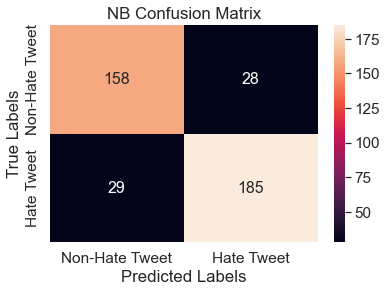

In [31]:
#plot confusion matrix 
ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(cnf_matrix1, annot=True, fmt='g', ax=ax, annot_kws={"size": 16});
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('NB Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet'])
ax.yaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet']);
plt.show()

/Users/claregarberg/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


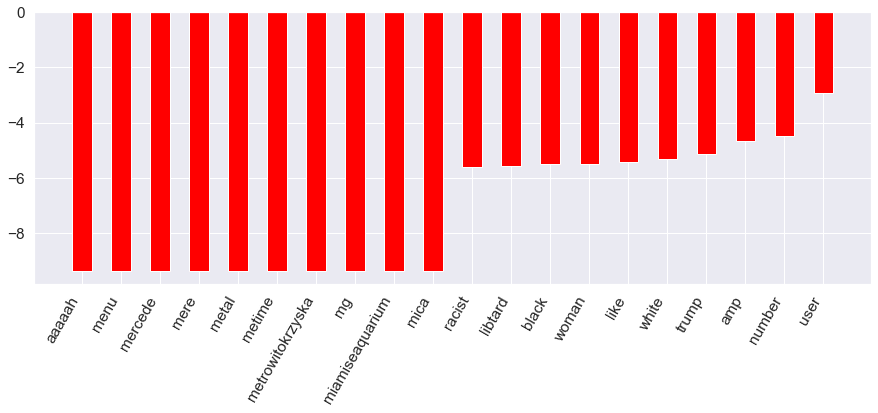

In [32]:
#plots top features
plot_coefficients(MyModelNB)

In [34]:
## SVM models
## we need to normalize the data for a SVM model

from sklearn import preprocessing

## normalizing train data
x = train_tweets.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
train_tweets_norm = pd.DataFrame(x_scaled, columns=train_tweets.columns)
train_tweets_norm.head()

## normalizing test data
y = test_tweets.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
y_scaled = min_max_scaler.fit_transform(y)
test_tweets_norm = pd.DataFrame(y_scaled, columns=test_tweets.columns)
test_tweets_norm.head()

,aaaaah,aande,aap,abe,abet,ability,able,ableism,abou,absolutely,...,zeegoldaward,zen,zero,zimbabwe,zionazi,zionism,zionist,zip,zootopia,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
from sklearn.svm import LinearSVC

SVM_Model=LinearSVC(C=1)

SVM_Model.fit(train_tweets_norm, train_labels)

Prediction2 = SVM_Model.predict(test_tweets_norm)

In [36]:
SVM_matrix = confusion_matrix(test_labels, Prediction2)
SVM_matrix

svm_acc = accuracy_score(test_labels, Prediction2)
svm_acc

print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_acc))

svm_f1 = f1_score(test_labels, Prediction2)
print('F1 Score of linear SVM classifier on test set: {:.2f}'.format(svm_f1))

Accuracy of SVM classifier on test set: 0.81
F1 Score of linear SVM classifier on test set: 0.81


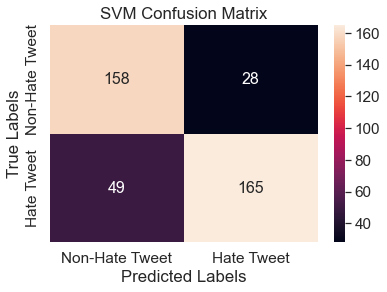

In [37]:
#plot confusion matrix 
ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(SVM_matrix, annot=True, fmt='g', ax=ax, annot_kws={"size": 16});
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('SVM Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet'])
ax.yaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet']);
plt.show()

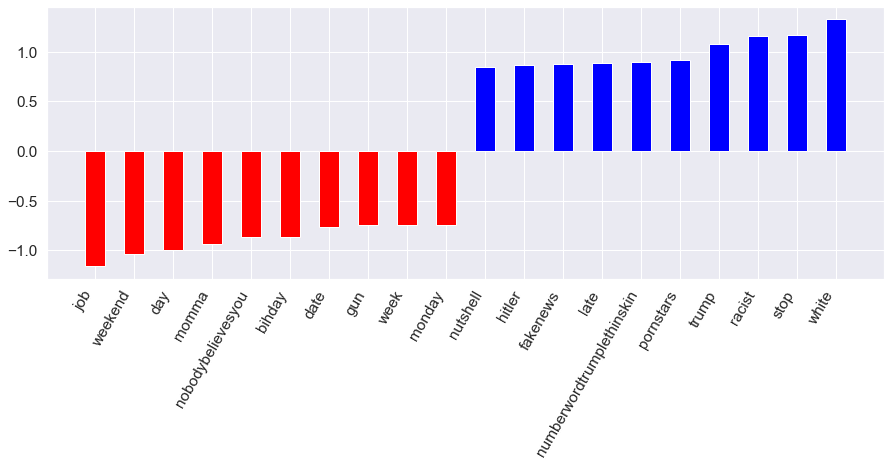

In [38]:
# plots top features
plot_coefficients(SVM_Model)

In [39]:
## trying an RBF kernel

from sklearn.svm import SVC

SVM_Model2=SVC(C=10, kernel='rbf')

SVM_Model2.fit(train_tweets_norm, train_labels)

Prediction3 = SVM_Model.predict(test_tweets_norm)

SVM_matrix2 = confusion_matrix(test_labels, Prediction3)
#SVM_matrix2

svm_acc2 = accuracy_score(test_labels, Prediction3)
#svm_acc2

print('Accuracy of SVM classifier on test set: {:.2f}'.format(svm_acc2))

svm2_f1 = f1_score(test_labels, Prediction3)
print('F1 Score of RBF SVM classifier on test set: {:.2f}'.format(svm2_f1))

Accuracy of SVM classifier on test set: 0.81
F1 Score of RBF SVM classifier on test set: 0.81


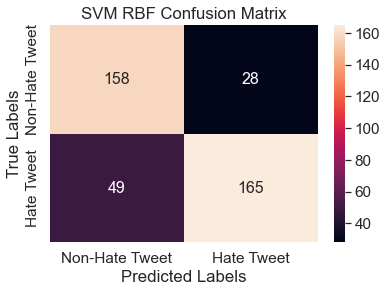

In [40]:
#plot confusion matrix 
ax = plt.subplot()
sns.set(font_scale=1.4) # label size
sns.heatmap(SVM_matrix2, annot=True, fmt='g', ax=ax, annot_kws={"size": 16});
ax.set_xlabel('Predicted Labels');
ax.set_ylabel('True Labels'); 
ax.set_title('SVM RBF Confusion Matrix'); 
ax.xaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet'])
ax.yaxis.set_ticklabels(['Non-Hate Tweet', 'Hate Tweet']);
plt.show()